## Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
df = pd.read_csv('mtcars.csv')

In [3]:
df.shape

(32, 11)

In [4]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [6]:
salary = pd.read_csv('Salary_Data.csv')

In [7]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
x=df[['disp','hp','wt']]
y=df['mpg']

In [11]:
x

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


## Import the class

In [12]:
from sklearn.linear_model import LinearRegression

## Create the object

In [14]:
reg = LinearRegression()

## Train the model

In [15]:
reg.fit(x,y)

LinearRegression()

## Predict the unseen data

In [23]:
disp = 250
hp = 100
wt = 2.31
reg.predict([[disp,hp,wt]])

D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.97554067])

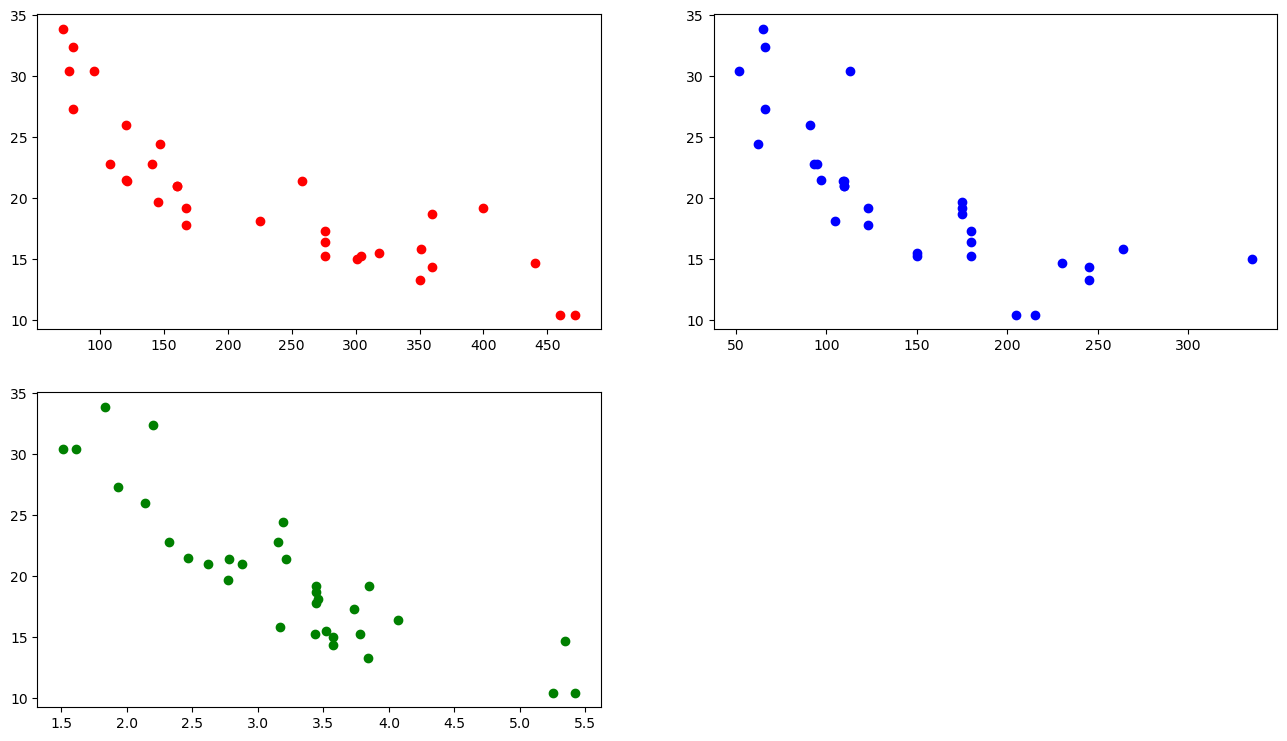

In [28]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.scatter(df['disp'], y, color='r')
plt.subplot(2,2,2)
plt.scatter(df['hp'], y, color='b')
plt.subplot(2,2,3)
plt.scatter(df['wt'], y, color='g')

In [29]:
reg.score(x,y)  #Accuracy of the prediction

0.8268361424946447

In [30]:
df = pd.read_csv('Social_Network_Ads.csv')

In [31]:
df.shape

(400, 5)

In [32]:
list(df.columns)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [33]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


## Separate the input and Output Variables

In [37]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [38]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


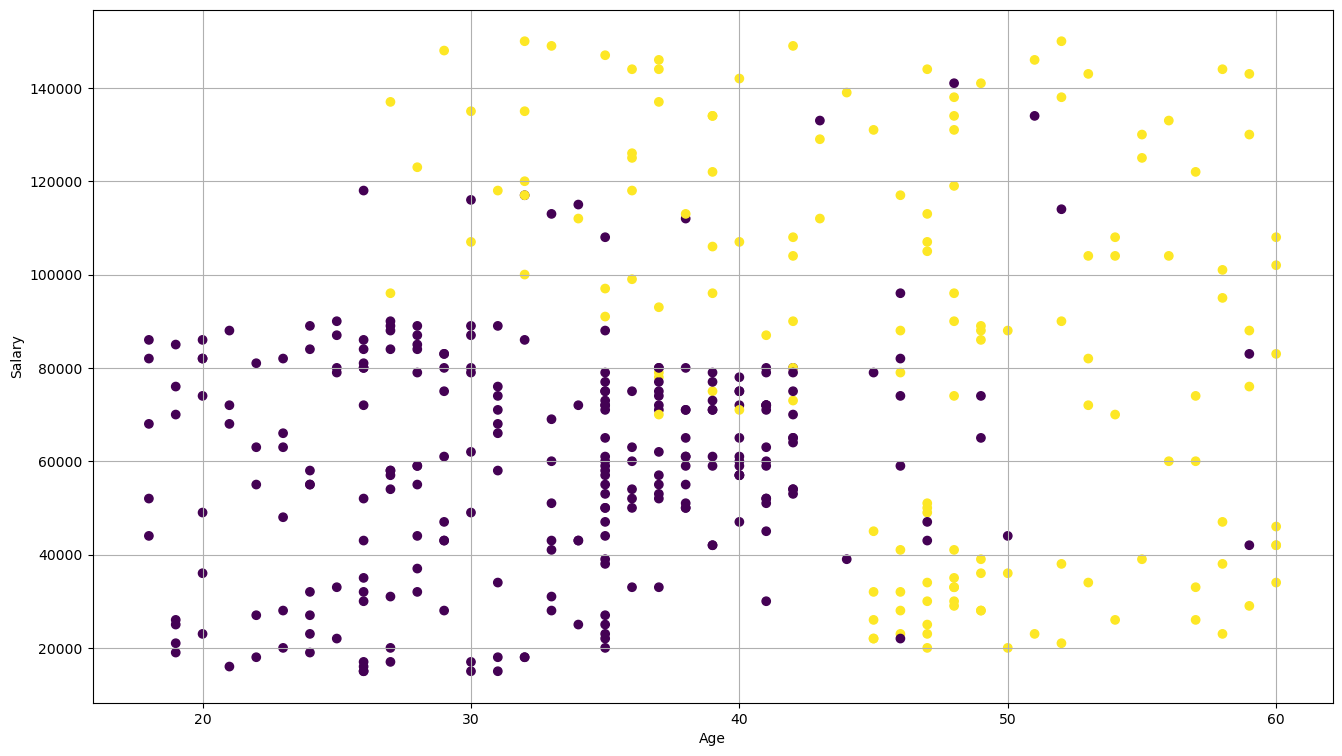

In [41]:
plt.figure(figsize=(16,9))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

## Import the class

In [42]:
from sklearn.tree import DecisionTreeClassifier

## Create the Object

In [45]:
classifier = DecisionTreeClassifier(random_state=0)

## Train the model

In [46]:
classifier.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

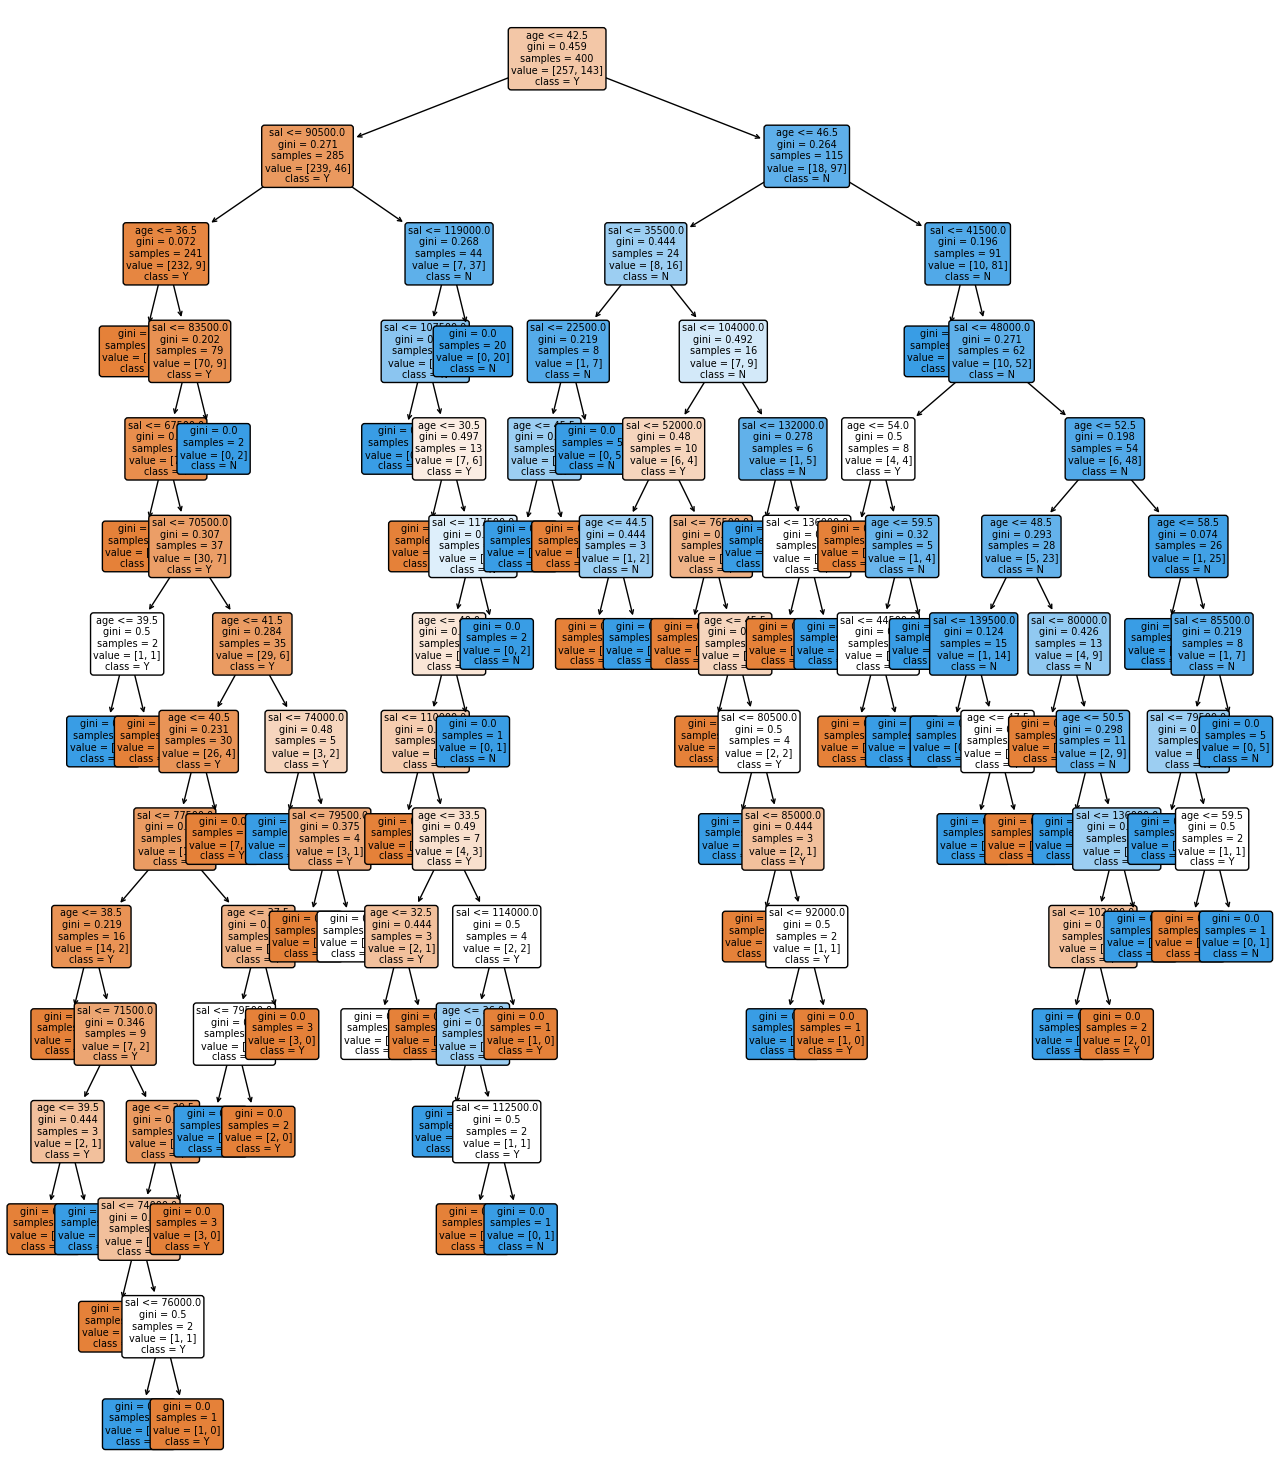

In [52]:
plt.figure(figsize=(16,19))
plot_tree(classifier, fontsize=7, feature_names=['age','sal'],class_names=['Y','N'], filled=True, rounded=True);

### Predict on unseen data

In [53]:
new = pd.DataFrame({'Age':[25,37,56,66],'EstimatedSalary':[34000,41000,26000,134000]})

In [54]:
new

,Age,EstimatedSalary
0,25,34000
1,37,41000
2,56,26000
3,66,134000


In [55]:
classifier.predict(new)

array([0, 0, 1, 1], dtype=int64)

### Naive bayes theorem

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
classifier = GaussianNB()

In [59]:
classifier.fit(x,y)

GaussianNB()

In [60]:
classifier.predict(new)

array([0, 0, 1, 1], dtype=int64)

In [62]:
classifier.predict_proba(new)

array([[9.81548646e-01, 1.84513544e-02],
       [8.71764430e-01, 1.28235570e-01],
       [8.96436195e-02, 9.10356381e-01],
       [1.71885570e-04, 9.99828114e-01]])